In [ ]:
#bharat intern task : Titanic classification using python

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
dataset = pd.read_csv("/content/Titanic-Dataset.csv")
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dataset.shape

(891, 12)

In [9]:
#checkin for missing values
missing = dataset.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


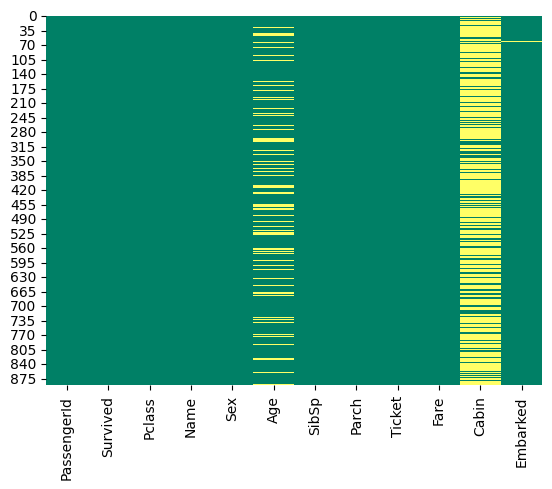

In [10]:
#displaying the missing values in data set
sns.heatmap(dataset.isnull(),cmap="summer",cbar = False)
plt.show()

In [11]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].mean())

In [12]:
categorical_columns = dataset.select_dtypes(include='object').columns
dataset[categorical_columns] = dataset[categorical_columns].fillna('Unknown')

In [13]:
#rechecking is any missing values are present in data
print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


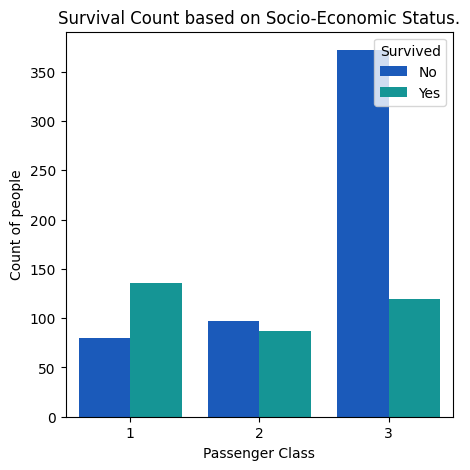

In [14]:
#displaying survival basing on socio-economic status passeneger class
plt.figure(figsize=(5, 5))
sns.countplot(x='Pclass', hue='Survived', data=dataset, palette='winter')
plt.title('Survival Count based on Socio-Economic Status.')
plt.xlabel('Passenger Class')
plt.ylabel('Count of people')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

Here this classification analysis tells that 3rd passenger class peoples death rate is very high as compared to others and the survived rate of class 1 is high when compared to others


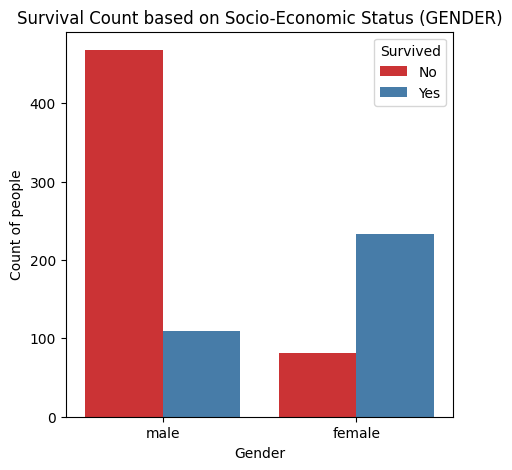

In [15]:
# Visualizing survival based on socio-economic status (Gender)
plt.figure(figsize=(5, 5))
sns.countplot(x='Sex', hue='Survived', data=dataset, palette='Set1')
plt.title('Survival Count based on Socio-Economic Status (GENDER)')
plt.xlabel('Gender')
plt.ylabel('Count of people')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

Here femlae rate of survival is quite high

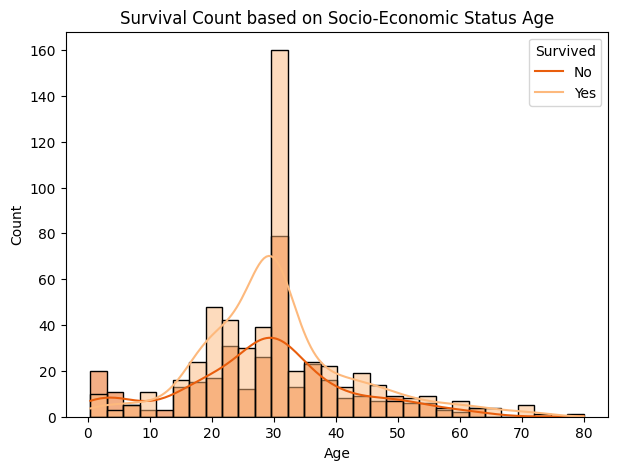

In [16]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=dataset, kde=True, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

The highest death and survival rate are of 30 aged people

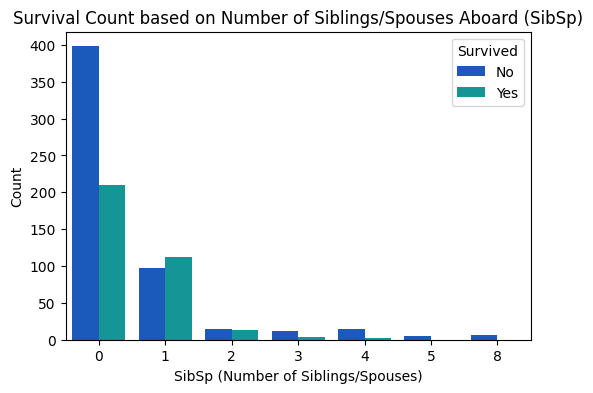

In [17]:
# Visualizing survival based on socio-economic status (siblings/spouses aboard (SibSp))
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=dataset, palette='winter')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

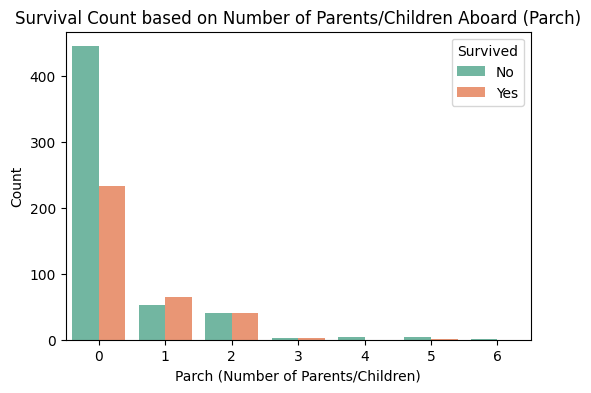

In [18]:
# Visualizing survival based on socio-economic status (number of parents/children aboard (Parch))
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=dataset, palette='Set2')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [19]:
dataset. head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [20]:
# Drop columns that are not likely to be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

dataset1 = dataset.drop(columns=columns_to_drop)
dataset1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


In [21]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
dataset1['Sex'] = label_encoder.fit_transform(dataset1['Sex'])

In [22]:
# Separate features and target variable
X = dataset1.drop('Survived', axis=1)
y = dataset1['Survived']

In [23]:
# Split the training data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
#Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [25]:
#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.746268656716418


In [27]:
test_df = pd.read_csv('/content/sample_data/test_titanic.csv')
test_df.head(2).T

,0,1
PassengerId,892,893
Pclass,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)"
Sex,male,female
Age,34.5,47.0
SibSp,0,1
Parch,0,0
Ticket,330911,363272
Fare,7.8292,7.0
Cabin,NaN,NaN


In [28]:
# Drop columns that are not likely to be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']
test_df1 = test_df.drop(columns=columns_to_drop)
test_df1

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [29]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
test_df1['Sex'] = label_encoder.fit_transform(test_df1['Sex'])
test_df1.count()

Pclass    418
Sex       418
Age       332
SibSp     418
Parch     418
dtype: int64

In [30]:
# Check for missing values
missing_values = test_df1.isnull().sum()
missing_values

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [31]:
#Handle missing value
test_df1['Age'] = test_df1['Age'].fillna(test_df1['Age'].mean())

In [32]:
# Predict on the test Dataset
predictions = model.predict(test_df1)

In [35]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('/content/sample_data/test_titanic.csv')['PassengerId'],'Survived': predictions})
prediction_data.to_csv('tit_prediction_df.csv', index=False)

In [36]:
# Load the tit_prediction_df datasets
predict_df = pd.read_csv('tit_prediction_df.csv')

In [37]:
predict_df.head(419)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


So, here you can see for the test data prediction is done using decision tree classifier

Now lets do it using RandomForest cLassifier

In [38]:
# Split the training data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

In [40]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Predict on the train dataset and check for accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8268156424581006


In [42]:
# Predict on the test set
predict_random= model.predict(test_df1)

In [44]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('/content/sample_data/test_titanic.csv')['PassengerId'],'Survived': predict_random})
prediction_data.to_csv('tit_prediction_df.csv', index=False)

In [45]:
# Load the tit_prediction_df datasets
predict_random_df = pd.read_csv('tit_prediction_df.csv')

In [46]:
predict_random_df. head(419)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
